<a href="https://colab.research.google.com/github/mishad01/Deep-Learning-and-Machine-Learning/blob/main/Deep%20Learning/Final_Of_Bangladeshi_Currency_Detection_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
rahnumatasnim1604103_bangladeshi_banknote_dataset_path = kagglehub.dataset_download('rahnumatasnim1604103/bangladeshi-banknote-dataset')

print('Data source import complete.')

Data source import complete.


In [36]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
import os
import re
import pandas as pd

# Path to the dataset folder
folder_path = '/kaggle/input/bangladeshi-banknote-dataset'

# List all files in the folder
file_names = os.listdir(folder_path)

# Extract the number outside the parentheses
numbers_outside = [
    int(re.match(r"^(\d+)", file).group(1))
    for file in file_names if re.match(r"^(\d+)", file)
]

# Find unique numbers and sort them
unique_numbers_outside = sorted(set(numbers_outside))

# Display the unique numbers as a DataFrame
df = pd.DataFrame(unique_numbers_outside, columns=["Numbers Outside Parentheses"])
print(df)

# If in Jupyter or Kaggle, display as a table
df.head(10)  # Display the first 10 unique numbers

Empty DataFrame
Columns: [Numbers Outside Parentheses]
Index: []


,Numbers Outside Parentheses


Currency Counts:
   Currency Type  Count
4              2   5105
6              5   6389
1             10   8382
2             20  14188
7             50   9837
0            100   6999
3            500  11927
5           1000   7715

Sample Images:
Currency: 100


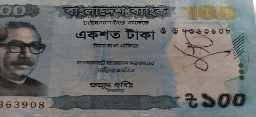

Currency: 10


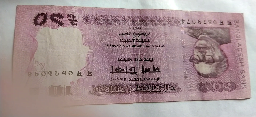

Currency: 20


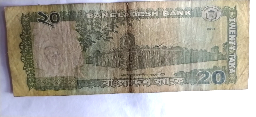

Currency: 500


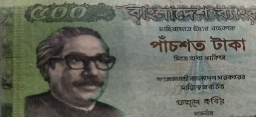

Currency: 2


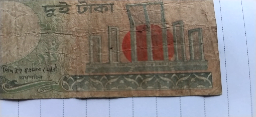

Currency: 1000


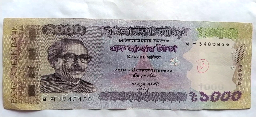

Currency: 5


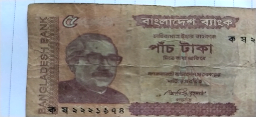

Currency: 50


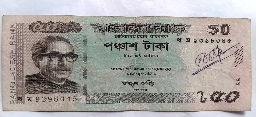

In [38]:
import os
import re
import pandas as pd
from collections import Counter
from IPython.display import Image, display

# Path to the dataset folder
folder_path = '/kaggle/input/bangladeshi-banknote-dataset/dataset'

# List all files in the folder
file_names = os.listdir(folder_path)

# Extract the number outside the parentheses (currency type) more robustly
currency_types = []
for file in file_names:
    match = re.match(r"^(\d+)\s*\(", file)  # Match number outside the parentheses
    if match:
        currency_types.append(int(match.group(1)))  # Extract the number

# Correcting potential mismatches (e.g., 10 vs. 100)
# Create a mapping for correction if needed (Optional, if errors are consistent)

# Count occurrences of each currency type
currency_counts = Counter(currency_types)

# Convert to DataFrame for display
df = pd.DataFrame(list(currency_counts.items()), columns=["Currency Type", "Count"])
df = df.sort_values(by="Currency Type")

# Display the count table
print("Currency Counts:")
print(df)

# Display sample images for each currency type
print("\nSample Images:")
for currency in currency_counts.keys():
    print(f"Currency: {currency}")
    # Find the first image for this currency
    matching_images = [file for file in file_names if file.startswith(f"{currency} ")]
    if matching_images:
        # Display the first image for the currency
        display(Image(filename=os.path.join(folder_path, matching_images[0])))

In [39]:
import os
import re
import pandas as pd
from collections import defaultdict
from IPython.display import Image, display

# Path to the dataset folder
folder_path = '/kaggle/input/bangladeshi-banknote-dataset/dataset'

# List all files in the folder
file_names = os.listdir(folder_path)

# Dictionary to store images for each currency type
currency_images = defaultdict(list)

# Extract the number outside the parentheses (currency type) more robustly
for file in file_names:
    match = re.match(r"^(\d+)\s*\(", file)  # Match number outside the parentheses
    if match:
        currency_type = int(match.group(1))  # Extract the number

        # Append the file to the corresponding currency type list
        currency_images[currency_type].append(file)

# Correcting potential mismatches (e.g., 10 vs. 100)
correction_mapping = {

    # Add more corrections if specific issues are known
}

# Correct currency type using the mapping
corrected_currency_images = defaultdict(list)
for currency_type, images in currency_images.items():
    corrected_type = correction_mapping.get(currency_type, currency_type)
    corrected_currency_images[corrected_type].extend(images)

# Count occurrences of each currency type
currency_counts = {currency: len(images) for currency, images in corrected_currency_images.items()}

# Convert to DataFrame for display
df = pd.DataFrame(list(currency_counts.items()), columns=["Currency Type", "Count"])
df = df.sort_values(by="Currency Type")

# Display the count table
print("Currency Counts:")
print(df)

# Separate image lists for each currency type
currency_image_lists = {currency: images for currency, images in corrected_currency_images.items()}

Currency Counts:
   Currency Type  Count
4              2   5105
6              5   6389
1             10   8382
2             20  14188
7             50   9837
0            100   6999
3            500  11927
5           1000   7715


In [40]:
currency_image_lists[100][:10]


['100 (850).png',
 '100 (2571).png',
 '100 (1650).png',
 '100 (87).png',
 '100 (352).png',
 '100 (2924).png',
 '100 (1017).png',
 '100 (5969).png',
 '100 (5251).png',
 '100 (5666).png']

In [41]:
currency_image_lists = dict(currency_image_lists)

In [42]:
currency_image_lists[10][:4]

['10 (1522).png', '10 (4061).png', '10 (3127).png', '10 (7581).png']

In [43]:
import random

# Dictionary containing currency types as keys and image lists as values
# Assuming currency_image_lists is already defined
limited_currency_image_lists = {}

# Limit each list to 5,000 images
for currency, images in currency_image_lists.items():
    if len(images) > 800:
        # Randomly sample 5,000 images
        limited_currency_image_lists[currency] = random.sample(images, 800)
    else:
        # Use all images if less than 5,000
        limited_currency_image_lists[currency] = images

# Print total counts for verification
for currency, images in limited_currency_image_lists.items():
    print(f"{currency}: {len(images)} images")


100: 800 images
10: 800 images
20: 800 images
500: 800 images
2: 800 images
1000: 800 images
5: 800 images
50: 800 images


In [44]:
currency_image_lists= limited_currency_image_lists

# Load and Preprocess Images

In [45]:
import os
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split

In [46]:
IMAGE_SIZE = (128, 128)  # Resize all images to 128x128
dataset_path = '/kaggle/input/bangladeshi-banknote-dataset/dataset'

# Create lists for images and labels
images = []
labels = []

# Iterate through the currency lists
for currency, file_list in currency_image_lists.items():
    for file_name in file_list:
        # Load image
        image_path = os.path.join(dataset_path, file_name)
        image = load_img(image_path, target_size=IMAGE_SIZE)

        # Convert image to array and normalize pixel values
        image_array = img_to_array(image) / 255.0
        images.append(image_array)

        # Append the currency type as label
        labels.append(int(currency))

# Convert to numpy arrays
images = np.array(images)
labels = np.array(labels)

# One-hot encode the labels (optional, for categorical output)
labels = to_categorical(labels)

# Train Test Split

In [47]:
# Split into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


# Model

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(labels.shape[1], activation='softmax')  # Output layer
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [49]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=32
)


Epoch 1/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - accuracy: 0.2679 - loss: 3.1291 - val_accuracy: 0.8990 - val_loss: 0.3658
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8067 - loss: 0.5355 - val_accuracy: 0.9573 - val_loss: 0.1597
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8983 - loss: 0.2645 - val_accuracy: 0.9802 - val_loss: 0.0718
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.9515 - loss: 0.1540 - val_accuracy: 0.9823 - val_loss: 0.0656
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.9567 - loss: 0.1280 - val_accuracy: 0.9812 - val_loss: 0.0484
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9674 - loss: 0.0914 - val_accuracy: 0.9958 - val_loss: 0.0264
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9754 - loss: 0.0691 - val_accuracy: 0.9906 - val_loss: 0.0330
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9737 - loss: 0.0775 - val_accu

# Result

In [50]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9952 - loss: 0.0160
Test Accuracy: 0.99


In [51]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np


In [52]:
# Predict on the test set
y_pred = model.predict(X_test)

# Convert predictions and true labels to class indices
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


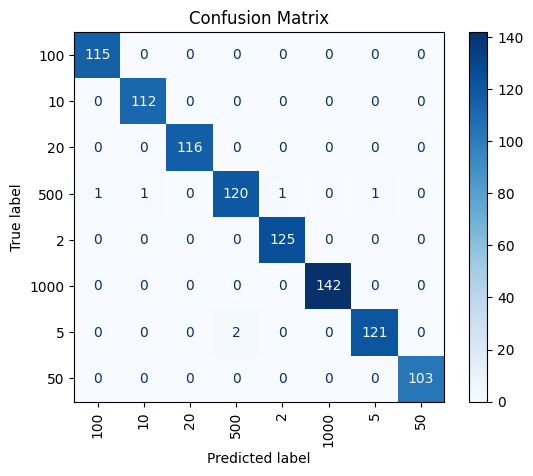

In [53]:
# Generate confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Define class labels (currency types)
class_names = list(currency_image_lists.keys())

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='Blues', xticks_rotation='vertical')
plt.title("Confusion Matrix")
plt.show()


In [54]:
from sklearn.metrics import classification_report
import numpy as np

# Predict on the test set
y_pred = model.predict(X_test)

# Convert predictions to class indices
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert true labels to class indices
y_true_classes = np.argmax(y_test, axis=1)

# Define class labels (currency types) and ensure they are strings
class_names = list(currency_image_lists.keys())
class_names = [str(name) for name in class_names]  # Convert to string if they are integers

# Generate classification report
report = classification_report(y_true_classes, y_pred_classes, target_names=class_names)

# Print the report
print(report)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
              precision    recall  f1-score   support

         100       0.99      1.00      1.00       115
          10       0.99      1.00      1.00       112
          20       1.00      1.00      1.00       116
         500       0.98      0.97      0.98       124
           2       0.99      1.00      1.00       125
        1000       1.00      1.00      1.00       142
           5       0.99      0.98      0.99       123
          50       1.00      1.00      1.00       103

    accuracy                           0.99       960
   macro avg       0.99      0.99      0.99       960
weighted avg       0.99      0.99      0.99       960

